# Android 어플리케이션 3 - 소켓 프로그래밍

## 1) 소켓 통신
- 안드로이드에서는 자바에서 사용하던 ```java.net``` 패키지의 클래스를 이용해서 소켓 통신 가능
- 안드로이드에서 주의할 점은 소켓 연결을 시도하거나 응답을 받아 처리할 때 스레드 이용을 강제함
- ```InetAddress```
  - 컴퓨터의 IP정보를 저장하는 클래스
  - static 메소드 인 ```getLocalHost()```, ```getByName(호스트이름)```,  ```getAllByName(호스트이름)```으로 객체를 생성
  - 객체 생성 시 ```UnknownHostException``` 예외처리가 필요  

        getHostName(): 호스트 명을 리턴  
        qgetAddress(): ip 주소를 바이트 배열로 리턴  
        qgetHostAddress(): ip주소를 문자열로 리턴   
        qtoString(): ip 주소를 문자열로 변환하여 리턴  

### 자바의 소켓(Java Socket)
- 소켓: 네트워크 어댑터를 추상화한 것으로 자바에서는 스트림 소켓과 데이터그램 소켓을
제공
- 소켓은 프로세스간의 통신을 담당하며 ```InputStream```과 ```OutputStream```을 가지고 있어서 이 2개의 Stream을 이용해서 통신
- 스트림 소켓은 TCP 프로토콜을 이용하고 데이터그램 소켓은 UDP 프로토콜을 사용
- TCP는 연결형 프로토콜이고 UDP는 비연결형 프로토콜
- 생성자

      Socket(): 기본 생성자
      Socket(InetAddress addr, int port): addr의 port에 접속을 시도
      Socket(String addr, int port): addr의 port에 접속을 시도
      Socket(InetAddress addr, int port, InetAddress localAddr, int port): 
                         addr의 port에 접속을 시도하고 현재 주소와 포트를 명시

- 주소가 잘못되면 ```NullPointerException```이 발생하고 port 번호가 잘못되면
```IllegalArgumentException```이 발생

### Socket 클래스의 메소드
- ```void close()```
- ```InetAddress getInetAddress()```
- ```int getPort()```
- ```InetAddress getLocalAddress()```
- ```int getLocalPort()```
- ```InputStream getInputStream()```
- ```OutputStream getOutputStream()```
- ```boolean getKeepAlive(), void setKeepAlive(boolean b)```
- ```int getReceiveBufferSize(), void setReceiveBufferSize(int a)```
- ```int getSendBufferSize(), void setSendBufferSize(int a)```
- ```int getSoTimeout(), void setSoTimeout(int a)```
- ```boolean isBound(), isClosed(), isConnected(), isInputShutdown(), isOutputShutdown()```
- ```void shutdownInput(), shutdownOutput()```

### StreamSocket
- 스트림 소켓은 TCP 프로토콜을 이용하는 소켓
- 상대방에게 연결을 요청하고 상대방이 허락하면 데이터를 전송하고 데이터의 수신 여부를
송신하는 측에 알려주는 방식
- 연결을 한 상태에서 통신을 하므로 안정적이지만 연결을 유지하는 트래픽 비용이 발생한다는 단점이 있음
  - 소켓 생성 및 사용방법  
    ``` Socket socket = new Socket(“서버ip”, 포트번호);```
  - 소켓 닫기  
    ```socket.close();```

### TCP 통신
- ```ServerSocket``` 클래스를 이용해서 클라이언트 서버 모델의 통신이 가능
- TCP 포트를 개방해서 그곳으로 요청을 받았을 때 사용하는 클래스
- ```ServerSocket```의 생성자
  - ```ServerSocket()```
  - ```ServerSocket(int port)```:포트 개방
  - ```ServerSocket(int port, int backlog)```:포트를 개방하고 클라이언트 개수를 설정하는 소켓
- ```ServerSocket```의 메소드
  - ```Socket accept()```: 바인딩 된 포트로부터 소켓 정보를 가져오는데 클라이언트가 접속할
때 까지 블럭
  - ```void close()```
  - ```InetAddress getInetAddress()```
  - ```int getLocalPort()```
  - ```int getReceiveBufferSize(), void setReceiveBufferSize(int n)```
  - ```int getSoTimeout(), void setSoTimeout(int n)```
  - ```boolean isBound(), isClosed()```

- 서버 프로그램과 클라이언트 프로그램 간의 통신 과정
  - 서버 측에서 서버 소켓을 생성해서 서버 컴퓨터의 특정 포트에서 클라이언트의 연결
요청을 처리할 준비
  - 클라이언트 프로그램은 접속할 서버의 IP주소와 포트 정보를 가지고 소켓을 생성해서
서버에 연결을 요청
  - 서버 소켓은 클라이언트의 연결 요청을 받으면 서버에 새로운 소켓을 생성해서
클라이언트의 소켓과 연결
  - 서버와 클라이언트 일대일 통신 가능
- 서버 소켓 생성 및 사용 방법  
  ```ServerSocket serverSocket = new ServerSocket(9000);```  
  ```Socket socket = serverSocket.accept()```

### UDP 통신
- Datagram Socket
  - 세션 설정 없이 IP 주소만으로 데이터를 전송하는 방식
  - 수신 상태를 확인할 수 없어서 데이터의 전송여부를 확인할 수 없는 방식
  - ```DatagramPacket``` 클래스와 ```DatagramSocket``` 클래스를 이용
  - ```DatagramSocket``` 클래스의 생성자   
    ```DatagramSocket()```  
    ```DatagramSocket(int port)```  
    ```DatagramSocket(int port, InetAddress addr)```  
  - ```DatagramSocket``` 클래스의 메소드  
    ```void close()```  
    ```void connect(InetAddress addr, int port)```  
    ```void disconnect()```  
    ```void receive(DatagramPacket Dp)```: 데이터 받기  
    ```void send(DatagramPacket Dp)```: 데이터 보내기  

- DatagramPacket클래스의 생성자
  - ```DatagramPacket(byte[] buf, int length)```: buf에 length 만큼 전송받기 위한 생성자
  - ```DatagramPacket(byte[] buf, int length, InetAddress addr, int port):``` 전송하기 위한 생성자
- ```DatagramPacket```의 메소드
  - ```byte[] getData```: 데이터 내용
  - ```int getLength()```: 데이터 길이

### Multicast 전송
- 224.0.0.0 – 239.255.255.255까지의 D 클래스 주소를 이용해서 이 네트워크에 접속한 모든 클라이언트들에게 데이터를 전송하는 방식으로 화상회의 등에서 주로 이용
- ```MulticastSocket``` 클래스를 이용하며 전송방식은 UDP
- 생성자
  - ```MulticastSocket()```
  - ```MulticastSocket(int port)``` 
- 메소드
  - ```joinGroup(InetAddress addr)```: 멀티캐스트 그룹에 참여
  - ```leaveGroup(InetAddress addr)```: 멀티캐스트 그룹에서 빠져나옴

### 소켓 서버

In [ ]:
# SocketServer.py
from socket import *

try:
    # TCP 서버 소켓 생성
    server_socket = socket(AF_INET, SOCK_STREAM)
    # 포트 번호 하나가 하나의 프로세스
    # 포트 번호는 프로그램 구분에 쓰임
    server_socket.bind(('http://172.30.1.10:5000/', 8000))
    # 서버가 수용할 수 있는 클라이언트 수(Backlog) 설정
    server_socket.listen(1)

    while True:
        print("Server waiting...")
        # 클라이언트가 요청을 보내면 요청 수용
        conn, addr = server_socket.accept()
        # 클라이언트 데이터 출력
        print(addr)
        # 클라이언트 메세지 확인
        # 1024는 문자 330개까지 수용 가능
        b = conn.recv(1024)
        # 클라이언트에게 메세지 전송. 전송시 반드시 인코딩 할 것
        conn.send("Hi Android. How are you doing today?".encode())
        # 전송된 메세지 확인 
        print(b.decode())
        # Disconnect
        conn.close()

except Exception as e:
    print("Error occurred: ", e)
finally:
    print('Run on close.')

### 클라이언트 소켓 

In [ ]:
# 클라이언트 서버
from socket import *

try:
    sock = socket(AF_INET, SOCK_STREAM)
    sock.connect(('172.30.1.10:5000', 5000))
    msg = input("message to send:")
    sock.send("Hello, Android".encode())
    b = sock.recv(1024)
    print(b.decode())
    sock.close()
    
except Exception as e:
    print('Error:', e)

```Android Studio```에서 소켓 활동이 가능한 새로운 활동인 ```SocketActivity``` 생성. 생성시 생성 창에서 **Launcher Activity**에 반드시 체크할 것.

In [ ]:
# activity_socket.xml

<RelativeLayout xmlns:android="http://schemas.android.com/apk/res/android" ... >

    <TextView
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:id="@+id/text"
        android:text="Click to send message"
        android:layout_centerHorizontal="true"
        android:layout_centerVertical="true"/>

    <Button
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:id="@+id/btn"
        android:layout_below="@+id/text"
        android:layout_centerHorizontal="true"
        android:layout_marginTop="20dp"
        android:text="send message"
        android:textSize="20sp"
        android:textStyle="bold" />

    <EditText
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:id="@+id/edit"
        android:layout_below="@+id/btn"
        android:layout_centerHorizontal="true"
        android:layout_marginTop="20dp"
        android:text="Send a message"
        android:textSize="20sp"
        android:textStyle="bold"
        android:hint="Enter a message"/>

</RelativeLayout>

In [ ]:
# SocketActivity.java

package com.example.pythonproj;

import androidx.appcompat.app.AppCompatActivity;
import android.os.Bundle;

public class SocketActivity extends AppCompatActivity {

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_socket);
    }
}

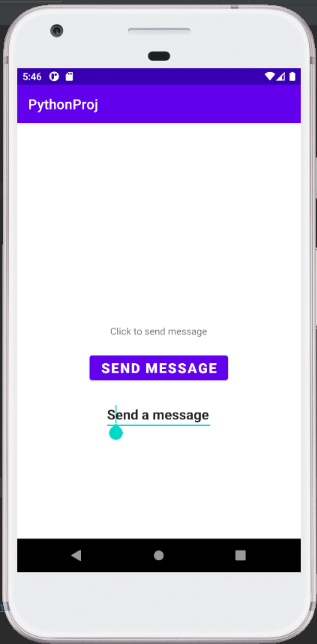

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

path = "/content/android_socket.png"
android_socket = cv2.imread(path)
android_socket = cv2.resize(android_socket, dsize=(0,0), fx=0.75, fy=0.75)
cv2_imshow(android_socket)

In [ ]:
# SocketActivity.java

# View modules
import android.widget.Button;
import android.widget.EditText;
# Handler modules
import android.os.Handler;
import android.os.Looper;

# create variables.
    // Variables to store view
    EditText edit;
    Button btn;
    // Variables to store received message
    String mes = "";

    // Handler that prints message which thread receives.
    Handler handler = new Handler(Looper.getMainLooper()){
        public void handleMessage(Message msg){
            Snackbar.make(edit, mes, Snackbar.LENGTH_LONG).show();
        }
    };

import java.io.BufferedReader;
import java.io.PrintWriter;
import java.net.Socket;

    // 서버와 통신할 스레드
    class TCPThread extends Thread {
        public void run(){
            // 소켓 통신 변수
            Socket socket = null;
            // 소켓 전송에 쓸 문자 스트림
            PrintWriter pw = null;
            // 소켓 읽기용 문자 스트림
            BufferedReader br = null;
            try{
                // 서버 포트 번호
                int port = 8000;
                // 새 소켓 생성
                socket = new Socket("000.00.0.00", port);
                // create a strea to send to socket
                pw = new PrintWriter(socket.getOutputStream());
                pw.println(edit.getText().toString()); // 인풋 메세지가 전송됨.
                pw.flush()

                // 스트림 읽기 변수
                br = new BufferedReader(new InputStreamReader(socket.getInputStream()));
                // 한 줄 읽음
                mes = br.readLine();
                // 메세지를 출력할 핸들러 호출
                handler.sendEmptyMessage(0);
            }
        }
    };

```SocketActivity.java```의 ```onCreate```로 뷰를 가져옴. 버튼을 클릭하면 스레드가 시작됨.

In [ ]:
# SocketActivity.java

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_socket);

        // first thing first: find view.
        edit = (EditText) findViewById(R.id.edit);
        btn = (Button) findViewById(R.id.btn);

        btn.setOnClickListener(new View.OnClickListener(){  
            @Override

            // thread does the job, handler reviews the view.
            public void onClick(View v){
                TCPThread th = new TCPThread();
                th.start();
            }
        });
    }
}

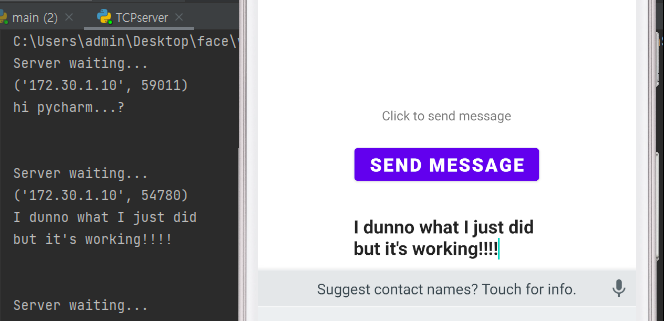

In [ ]:
path = "/content/android-TCPserver.png"
img = cv2.imread(path)
#img = cv2.resize(TCPserver_communication, dsize=(0,0), fx=0.5, fy=0.5)
cv2_imshow(img)

# 오류 공책

      Error occurred:  socket.bind() takes exactly one argument (2 given)
  - ```server_socket.bind(('http://000.00.0.00:5000/', 8000))```
  - ```.bind``` 는 튜플의 튜플만 받음. 

      Error occurred:  [Errno 11001] getaddrinfo failed

gaierror: [Errno 11001] getaddrinfo failed is caused **when the code is being called from behind a firewall or proxy**. Please ensure the application has access to port 80. Thank you for the answer. 
